### **Triângulo de Sierpinski - Fractal**

Este código faz parte de um projeto que visa utilizar numpy para realizar transformações em um objeto de imagem em forma de pirâmide e convertê-lo em um fractal seguindo o modelo de Triângulo de Sierpinski.

O Triângulo de Sierpinski - também chamado de Junta de Sierpinski - é uma figura geométrica obtida através de um processo recursivo. Ele é uma das formas elementares da geometria fractal por apresentar algumas propriedades, tais como: ter tantos pontos como o do conjunto dos números reais; ter área igual a zero; ser auto-semelhante (uma sua parte é idêntica ao todo); não perder a sua definição inicial à medida que é ampliado. (Wikipédia)

O projeto envolve o uso de numpy, uma poderosa biblioteca de computação numérica em Python, para manipular os dados da imagem e aplicar várias transformações para criar uma estrutura de Sierpinkski através do método iterativo (Sem o uso de recursividade). A imagem resultante é então processada para gerar um padrão fractal.
Ao aproveitar os recursos de manipulação de array do numpy, o código é capaz de realizar as transformações necessárias e gerar imagens fractais visualmente e salvar lás na pasta de Imagens, permitindo identificar cada nível desse fractal.

Observe que é necessário utilizar dependências adicionais para ser executado com êxito, portando garanta que todas bibliotecas foram instaladas e importadas corretamente.

#### 1. Importando bibliotecas

In [2]:
import matplotlib.pyplot as plt   # Plotar gráficos e imagens.
import numpy as np                # Funções matemáticas.
import skimage                    # Processamento de imagens (Importar imagens).
from scipy import ndimage         # Processamento de imagens (Transformações de imagens).
import os                         # Biblioteca para manipulação de arquivos e pastas.


dir_imagens = 'imagens/'          # Diretório onde estão as imagens.

#### 2. Dicas para entendimento do código

* A imagem a seguir representa a ordem em que os triângulos foram criados, dessa forma é possível identificar o trecho de código responsável pela construção dos triângulos separadamente. <br>
![Alt Text](Imagens/ordem_triangulos_criados.png)


* A biblioteca skimage responsável por fazer a leitura das imagens para np.ndarray, considera o intervalo dos atributos referentes as cores de um pixels de 0 a 255. <br> Variando os atributos [R, G, B, T]. Exemplo: Branco = [255., 255., 255,. 255.]

#### 3. Funções auxiliares

In [4]:
def carregar_imagem(nome_arquivo='imagem_original.png') -> np.ndarray:
    """
    Carrega uma imagem a partir de um arquivo.

    Parâmetros:
        nome_arquivo (str): Nome do arquivo da imagem a ser carregada.

    Retorno:
        imagem (np.ndarray): Imagem carregada.
    """

    imagem = skimage.io.imread(os.path.join(dir_imagens, nome_arquivo))
    
    return imagem

In [5]:
def mostrar_imagem(imagem : np.ndarray, titulo='') -> None:
    """
    Mostra uma imagem no campo de exibição.
    
    Parâmetros:
        imagem (np.ndarray): Imagem a ser mostrada.
        titulo (str): Título da janela da imagem.
        
    Retorno:
        None
    """

    plt.figure(figsize=(5,5))

    # Definir comprimento de x e y para igual as dimensões da imagem original (image.shape).
    plt.xlim(0, 441)
    plt.ylim(387, 0)
    plt.title(titulo)

    # Plotar a imagem.
    plt.imshow(imagem)

In [6]:
def mudar_cor_imagem(imagem: np.ndarray, cor_antiga=[0., 0., 0., 255.], cor_nova=[255, 255, 255, 255]) -> np.ndarray:
    """
    Muda a cor de uma imagem.

    Parâmetros:
        imagem (np.ndarray): Imagem a ser modificada.
        cor_antiga (list): Cor a ser substituída, padrão é preto.
        cor_nova (list): Nova cor, padrão é branco.

    Retorno:
        imagem_modificada (np.ndarray): Imagem modificada.
    """

    imagem_modificada = imagem.copy() # Cria uma cópia da imagem original.
    eh_pixel_cor_antiga = imagem_modificada == cor_antiga # Máscara booleana.
    imagem_modificada[np.all(eh_pixel_cor_antiga, axis=-1)] = cor_nova # Filtragem e mudança de cor.

    return imagem_modificada

#### 4. Processamento das imagens

##### 4.1 Imagem original

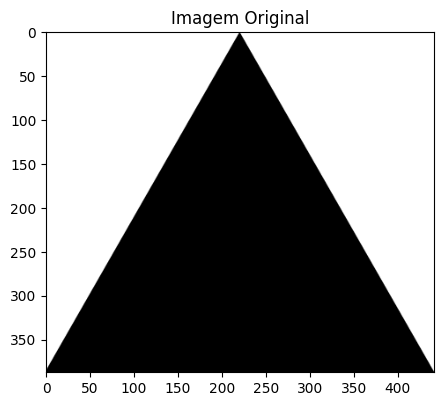

In [7]:
imagem_original = carregar_imagem() # (Tópico 2).
imagem_aux = imagem_original.copy() # Imagem utilizada para modificações.
mostrar_imagem(imagem_original, 'Imagem Original')
plt.savefig(f'{dir_imagens}/figura_original.png')

##### 4.2 Imagem modificada nível 1

In [ ]:
# Transformações.
imagem_modificada = imagem_original.copy()                                                     # Cria uma cópia da imagem original.
imagem_modificada = ndimage.zoom(imagem_modificada, (0.5, 0.5, 1))                             # Reduz pela metade o tamanho da imagem original.
imagem_modificada = ndimage.rotate(imagem_modificada, 180)                                     # Rotaciona a imagem 180 graus.
imagem_modificada = mudar_cor_imagem(imagem_modificada, [0, 0, 0, 255], [255, 0, 0, 255])      # Triângulo de preto -> vermelho, (Tópico 2).
imagem_modificada = mudar_cor_imagem(imagem_modificada, [255, 255, 255, 255], [0, 0, 0, 255])  # Fundo branco -> preto, (Tópico 2).

In [9]:
# Inserir imagem modificada (np.ndarray) dentro da imagem original (np.ndarray).
tam_original = np.array(imagem_aux.shape[:2])           # (height, width)
tam_modificada = np.array(imagem_modificada.shape[:2])  # (height, width)

# Triângulo 1.
imagem_aux[tam_original[0]//2 : tam_original[0]//2 + tam_modificada[0], 
           tam_original[1]//4 : tam_original[1]//4 + tam_modificada[1]] = imagem_modificada

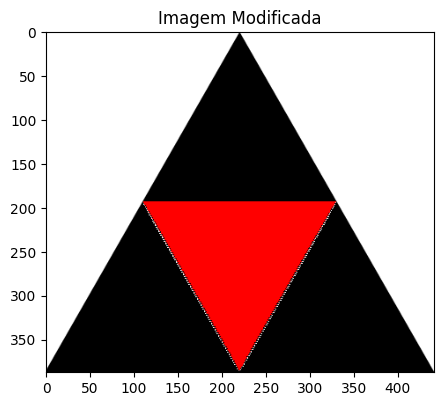

In [10]:
# Visualizar e salvar a imagem modificada.
mostrar_imagem(imagem_aux, 'Imagem Modificada')
plt.savefig(f'{dir_imagens}/figura_modificada1.png')

##### 4.3 Imagem modificada nível 2

In [11]:
# Transformações.
imagem_modificada = imagem_original.copy()                                                     # Cria uma cópia da imagem original.
imagem_modificada = ndimage.zoom(imagem_modificada, (0.25, 0.25, 1))                           # Reduz 1/4 o tamanho da imagem original.
imagem_modificada = ndimage.rotate(imagem_modificada, 180)                                     # Rotaciona a imagem 180 graus.
imagem_modificada = mudar_cor_imagem(imagem_modificada, [0, 0, 0, 255], [0, 255, 0, 255])      # Triângulo de preto -> verde, (Tópico 2).
imagem_modificada = mudar_cor_imagem(imagem_modificada, [255, 255, 255, 255], [0, 0, 0, 255])  # Fundo branco -> preto, (Tópico 2).

In [12]:
# Inserir imagem modificada (np.ndarray) dentro da imagem original (np.ndarray).
tam_original = np.array(imagem_aux.shape[:2])               # (height, width)
tam_modificada = np.array(imagem_modificada.shape[:2])      # (height, width)
tam_meio_original = tam_original//2                         # (height // 2, width // 2)
tam_um_quarto_original = tam_original//4                    # (height // 4, width // 4)

# Triângulo 2.
imagem_aux[tam_original[0]-tam_modificada[0] : tam_original[0]-tam_modificada[0] + tam_modificada[0],
           tam_um_quarto_original[1] // 2 : tam_um_quarto_original[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 3.
imagem_aux[tam_original[0]-tam_modificada[0] : tam_original[0]-tam_modificada[0] + tam_modificada[0],
           tam_original[1] - tam_um_quarto_original[1] - tam_modificada[1] // 2 : tam_original[1] - tam_um_quarto_original[1] - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 4.
imagem_aux[tam_um_quarto_original[0] : tam_um_quarto_original[0] + tam_modificada[0],
           tam_meio_original[1] - tam_modificada[1] // 2 : tam_meio_original[1] - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

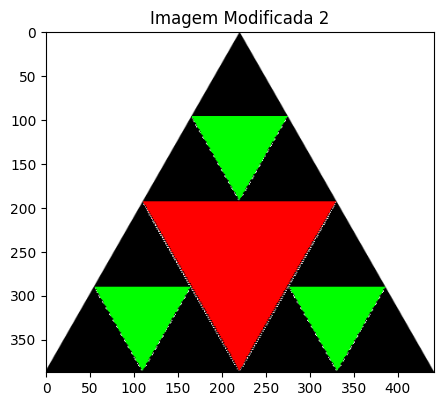

In [13]:
# Visualizar e salvar a imagem modificada.
mostrar_imagem(imagem_aux, 'Imagem Modificada 2')
plt.savefig(f'{dir_imagens}/figura_modificada2.png')

##### 4.4 Imagem modificada nível 3

In [14]:
# Transformações.
imagem_modificada = imagem_original.copy()                                                     # Cria uma cópia da imagem original.
imagem_modificada = ndimage.zoom(imagem_modificada, (0.125, 0.125, 1))                         # Reduz 1/8 o tamanho da imagem original.
imagem_modificada = ndimage.rotate(imagem_modificada, 180)                                     # Rotaciona a imagem 180 graus.
imagem_modificada = mudar_cor_imagem(imagem_modificada, [0, 0, 0, 255], [0, 0, 255, 255])      # Triângulo de preto -> azul, (Tópico 2).
imagem_modificada = mudar_cor_imagem(imagem_modificada, [255, 255, 255, 255], [0, 0, 0, 255])  # Fundo branco -> preto, (Tópico 2).

In [15]:
# Inserir imagem modificada (np.ndarray) dentro da imagem original (np.ndarray).
tam_original = np.array(imagem_aux.shape[:2])               # (height, width)
tam_modificada = np.array(imagem_modificada.shape[:2])      # (height, width)
tam_meio_original = tam_original//2                         # (height // 2, width // 2)
tam_um_quarto_original = tam_original//4                    # (height // 4, width // 4)
tam_um_oitavo_original = tam_original//8                    # (height // 8, width // 8)


# Triângulo 5.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] : tam_original[0] - tam_um_oitavo_original[0] + tam_modificada[0],
           tam_um_oitavo_original[1] - tam_modificada[1] // 2 : tam_um_oitavo_original[1] - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 6.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] : tam_original[0] - tam_um_oitavo_original[0] + tam_modificada[0],
           tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 : tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 7.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] * 3 : tam_original[0] - tam_um_oitavo_original[0] * 3 + tam_modificada[0],
           tam_um_oitavo_original[1] * 2 - tam_modificada[1] // 2 : tam_um_oitavo_original[1] * 2 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 8.
imagem_aux[tam_um_oitavo_original[0] * 3 : tam_um_oitavo_original[0] * 3 + tam_modificada[0],
           tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 : tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 9.
imagem_aux[tam_um_oitavo_original[0] * 3 : tam_um_oitavo_original[0] * 3 + tam_modificada[0],
           tam_original[1] - tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 : tam_original[1] - tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 10.
imagem_aux[tam_um_oitavo_original[0] : tam_um_oitavo_original[0] + tam_modificada[0],
           tam_original[1] // 2 - tam_modificada[1] // 2 : tam_original[1] // 2 - tam_modificada[1] // 2  + tam_modificada[1]] = imagem_modificada

# Triângulo 11.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] : tam_original[0] - tam_um_oitavo_original[0] + tam_modificada[0],
           tam_original[1] - tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 : tam_original[1] - tam_um_oitavo_original[1] * 3 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 12.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] : tam_original[0] - tam_um_oitavo_original[0] + tam_modificada[0],
           tam_original[1] - tam_um_oitavo_original[1] - tam_modificada[1] // 2 : tam_original[1] - tam_um_oitavo_original[1] - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada

# Triângulo 13.
imagem_aux[tam_original[0] - tam_um_oitavo_original[0] * 3 : tam_original[0] - tam_um_oitavo_original[0] * 3 + tam_modificada[0],
           tam_original[1] - tam_um_oitavo_original[1] * 2 - tam_modificada[1] // 2 : tam_original[1] - tam_um_oitavo_original[1] * 2 - tam_modificada[1] // 2 + tam_modificada[1]] = imagem_modificada


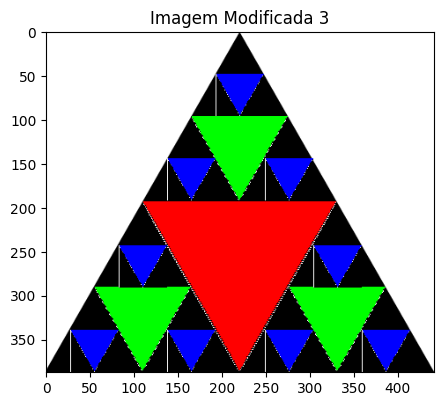

In [16]:
# Visualizar e salvar a imagem modificada.
mostrar_imagem(imagem_aux, 'Imagem Modificada 3')
plt.savefig(f'{dir_imagens}/figura_modificada3.png')

#### 5. Referências

https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_de_Sierpinski

#### 6. Projetos Futuros

Para projetos futuros, tenho o objetivo de implementar os triângulos de Sierpinski utilizando recursividade e modelos matemáticos através de funções.

A abordagem recursiva é particularmente interessante, pois permite uma implementação elegante e eficiente do algoritmo. A ideia é dividir o triângulo maior em três triângulos menores e, em seguida, repetir o processo nos triângulos menores até atingir um nível de detalhe desejado.

Para implementar os triângulos de Sierpinski, pretendo criar uma função recursiva que receba como parâmetros o triângulo maior, o nível de detalhe desejado e as coordenadas dos vértices do triângulo. A função irá dividir o triângulo em três partes menores e chamar a si mesma para cada um dos triângulos menores. Esse processo será repetido até atingir o nível de detalhe desejado.

Além disso, pretendo explorar modelos matemáticos para gerar os triângulos de Sierpinski de forma mais eficiente. Através de abordagens matemáticas como o uso de matrizes de transformação e sistemas de equações lineares.